#Hackathon #2

**Machine Learning part**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [6]:
def load_review_data(filename: str = 'Hackathon_Moises - Trustpilot_Full Review.csv') -> pd.DataFrame:
    #"""Load and validate trustpilot review dataset."""
    df = pd.read_csv(filename)
    return df

df = load_review_data()

In [7]:
df.head()

,org name,reviewer,experience date,review date,head line,full review,clean_review,processes_review,word_count,positive_count,negative_count,sentiment_theme,sentiment,reviewer_cleaned,review_count,repeat_reviewer
0,PetFlow,George Romer,"May 13, 2023",14 hours ago,Value added online retailer,"I shopped the product, Milk Bone Pill Pouches ...",i shopped the product milk bone pill pouches f...,i shopped product milk bone pill pouches sever...,40,5.0,1.0,Customer Support,Positive,george romer,1,No
1,PetFlow,DEBORAH HELFER,"May 13, 2023",11 hours ago,Arm and Hammer litter,"Arm and Hammer litter, is dust free, clumping/...",arm and hammer litter is dust free clumpingsea...,arm hammer litter dust free clumpingseal which...,39,4.0,0.0,Value & Convenience,Positive,deborah helfer,1,No
2,PetFlow,Sam Walker,"May 14, 2023",5 hours ago,I have been with them since 2013 and my…,I have been with them since 2013 and my orders...,i have been with them since and my orders are...,i have been with them since my orders are on t...,50,3.0,2.0,Fulfillment & Shipping,Positive,sam walker,1,No
3,PetFlow,Janie,"May 13, 2023",A day ago,In Stock at PetFlow !,PetFlow was able to ship an important dog food...,petflow was able to ship an important dog food...,petflow was able ship an important dog food pr...,43,2.0,1.0,Account & Website,Positive,janie,1,No
4,PetFlow,VANESSA HOWARD,"May 14, 2023",6 hours ago,I received a damaged pet food bag and…,I received a damaged pet food bag and the cust...,i received a damaged pet food bag and the cust...,i received a damaged pet food bag customer ser...,44,3.0,1.0,Customer Support,Positive,vanessa howard,1,No


In [23]:
#preparing data and filtering out Neutral
df = df[['processes_review', 'sentiment']].dropna()
df = df[df['sentiment'] != 'Neutral']
df.head(15)

,processes_review,sentiment
0,i shopped product milk bone pill pouches sever...,Positive
1,arm hammer litter dust free clumpingseal which...,Positive
2,i have been with them since my orders are on t...,Positive
3,petflow was able ship an important dog food pr...,Positive
4,i received a damaged pet food bag customer ser...,Positive
5,this second time i have received rancid dog fo...,Negative
6,company was very responsive problems i had man...,Positive
7,ordered dog food days later no shipment no con...,Negative
8,people there if contacted go up beyond answer ...,Positive
9,this was my first purchase from petflow i am i...,Positive


In [16]:
#train test split
from sklearn.model_selection import train_test_split

X = df['processes_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [17]:
#vectorize text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [18]:
#Train Naïve Bayes

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [19]:
#predict and evaluate

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8263598326359832
              precision    recall  f1-score   support

    Negative       1.00      0.07      0.13        89
    Positive       0.82      1.00      0.90       389

    accuracy                           0.83       478
   macro avg       0.91      0.53      0.51       478
weighted avg       0.86      0.83      0.76       478

[[  6  83]
 [  0 389]]


In [25]:
results = pd.DataFrame({
    "processed_review": X_test,
    "rule_sentiment": y_test,
    "ml_prediction": y_pred
})

In [26]:
#adding disagreement type
results["disagreement_type"] = results.apply(
    lambda x:
        "Rule Positive / ML Negative" if (x["rule_sentiment"]=="Positive" and x["ml_prediction"]=="Negative")
        else "Rule Negative / ML Positive" if (x["rule_sentiment"]=="Negative" and x["ml_prediction"]=="Positive")
        else "Agreement",
    axis=1
)


In [28]:
results.head(15)


,processed_review,rule_sentiment,ml_prediction,disagreement_type
2406,quick cat food shipping fair price easy orderi...,Positive,Positive,Agreement
2491,simple order came amazingly fast,Positive,Positive,Agreement
3130,this was my first order from petflow but it wo...,Positive,Positive,Agreement
1883,excellent selection of dog food treats good pr...,Positive,Positive,Agreement
2903,fast shipping product arrives in great shape n...,Positive,Positive,Agreement
901,i placed my order online easily i did receive ...,Negative,Positive,Rule Negative / ML Positive
1427,worst spoke with a customer service rep ryan h...,Negative,Positive,Rule Negative / ML Positive
1746,i had hoped that petflow would be a reliable s...,Positive,Positive,Agreement
3473,ive used petflow a year now love it orders are...,Positive,Positive,Agreement
1315,spoke with a rep named ryan he was extremely r...,Positive,Positive,Agreement


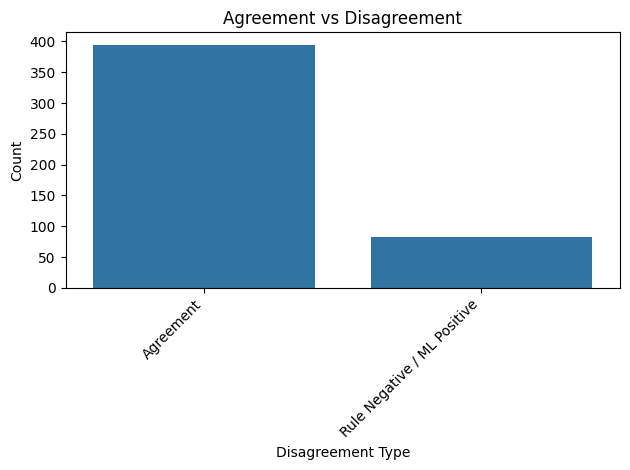

In [ ]:
#Agreement vs Disagreement

plt.figure(figsize=(8,6))
results["disagreement_type"].value_counts().plot(kind="bar")
plt.title("Agreement vs Disagreement Between Rule-Based and ML Sentiment")
plt.tight_layout()
plt.savefig("ml_sentiment_disagreement.png", dpi=300)
plt.show()




In [32]:
disagreements_df = results[results['disagreement_type'] != 'Agreement']
disagreements_df.head()

,processed_review,rule_sentiment,ml_prediction,disagreement_type
901,i placed my order online easily i did receive ...,Negative,Positive,Rule Negative / ML Positive
1427,worst spoke with a customer service rep ryan h...,Negative,Positive,Rule Negative / ML Positive
452,we received a shipment from petflow never made...,Negative,Positive,Rule Negative / ML Positive
1671,this company has labeled me as fraud after a p...,Negative,Positive,Rule Negative / ML Positive
208,excellent customer service thank you,Negative,Positive,Rule Negative / ML Positive


In [38]:
#disagreement samples
print("Rule Negative / ML Positive Samples:")
print(disagreements_df[disagreements_df['disagreement_type'] == 'Rule Negative / ML Positive']['processed_review'].head(5))

print("\nRule Positive / ML Negative Samples:")
print(disagreements_df[disagreements_df['disagreement_type'] == 'Rule Positive / ML Negative']['processed_review'].head(5))

Rule Negative / ML Positive Samples:
901     i placed my order online easily i did receive ...
1427    worst spoke with a customer service rep ryan h...
452     we received a shipment from petflow never made...
1671    this company has labeled me as fraud after a p...
208                  excellent customer service thank you
Name: processed_review, dtype: object

Rule Positive / ML Negative Samples:
Series([], Name: processed_review, dtype: object)
